# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

#Sample Dataset


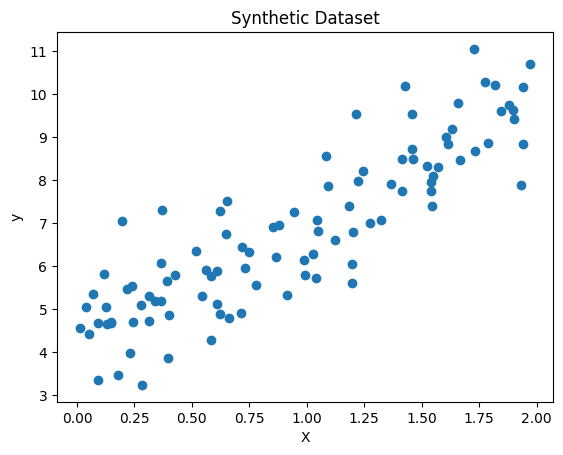

In [2]:
# Generate synthetic dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot dataset
plt.scatter(X, y)
plt.title("Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


# Linear Regression from Scratch



=== From Scratch ===
Weight: 2.7701133864384806
Bias: 4.21509615754675
MSE: 0.8065845639670534


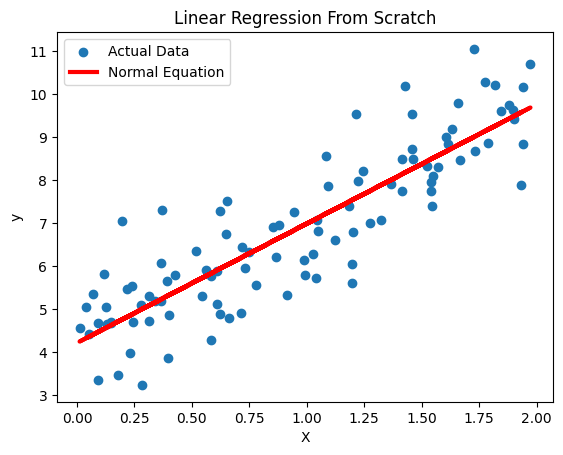

In [21]:
# Add bias term (column of 1s)
X_b = np.c_[np.ones((len(X), 1)), X]

# Apply Normal Equation
theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract parameters
b_normal = theta_normal[0][0]
w_normal = theta_normal[1][0]

# Predictions
y_pred_normal = X_b @ theta_normal

# Calculate MSE
mse_normal = np.mean((y - y_pred_normal) ** 2)

print("=== From Scratch ===")
print("Weight:", w_normal)
print("Bias:", b_normal)
print("MSE:", mse_normal)

# Plot original data
plt.scatter(X, y, label="Actual Data")

# Plot regression line (Normal Equation)
plt.plot(X, y_pred_normal, color="red", linewidth=3, label="Normal Equation")

plt.title("Linear Regression From Scratch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# LR using Scikit-Learn

=== Scikit-Learn ===
Weight: 2.7701133864384837
Bias: 4.215096157546747
MSE: 0.8065845639670531


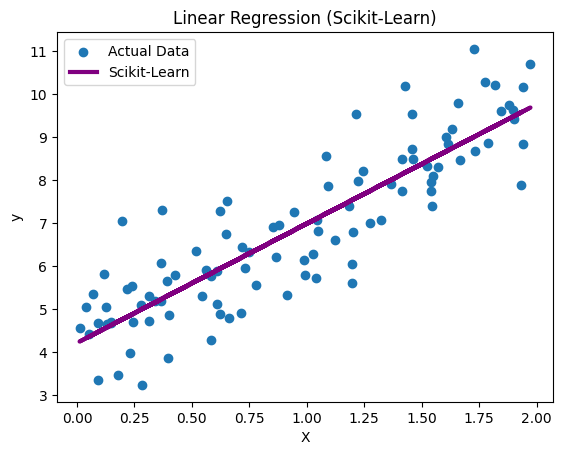

In [22]:
# Create Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred_sklearn = model.predict(X)

# Calculate MSE
w_sklearn = model.coef_[0][0]
b_sklearn = model.intercept_[0]
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("=== Scikit-Learn ===")
print("Weight:", w_sklearn)
print("Bias:", b_sklearn)
print("MSE:", mse_sklearn)


# Plot original data
plt.scatter(X, y, label="Actual Data")

# Plot regression line (Sklearn)
plt.plot(X, y_pred_sklearn, color="purple", linewidth=3, label="Scikit-Learn")

plt.title("Linear Regression (Scikit-Learn)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# LR with Gradient Descent


=== Gradient Descent (From Scratch) ===
Weight: 2.7701133864384917
Bias: 4.215096157546739
MSE: 0.806584563967053


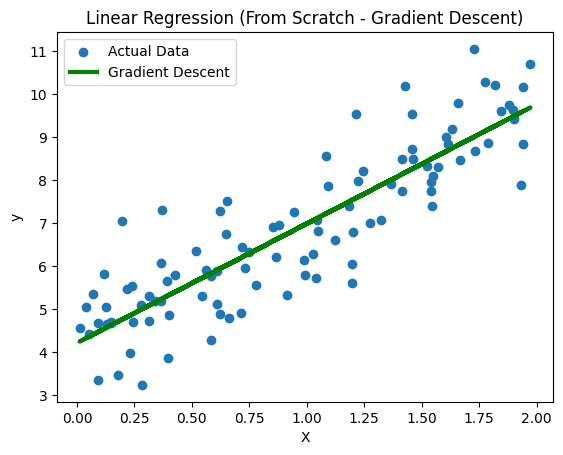

In [19]:
# Initialize parameters separately
theta_gd = np.random.randn(2, 1)

learning_rate = 0.1
n_iterations = 1000
m = X.shape[0]

for _ in range(n_iterations):

    # Prediction
    y_pred_gd = X_b @ theta_gd

    # Compute gradients
    gradients = (2 / m) * X_b.T @ (y_pred_gd - y)

    # Update parameters
    theta_gd = theta_gd - learning_rate * gradients

# Extract parameters
b_gd = theta_gd[0][0]
w_gd = theta_gd[1][0]

# Predictions
y_pred_gd = X_b @ theta_gd

# MSE
mse_gd = np.mean((y - y_pred_gd) ** 2)

print("\n=== Gradient Descent (From Scratch) ===")
print("Weight:", w_gd)
print("Bias:", b_gd)
print("MSE:", mse_gd)

# Plot original data
plt.scatter(X, y, label="Actual Data")

# Plot regression line (Gradient Descent)
plt.plot(X, y_pred_gd, color="green", linewidth=3, label="Gradient Descent")

plt.title("Linear Regression (From Scratch - Gradient Descent)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Comparison


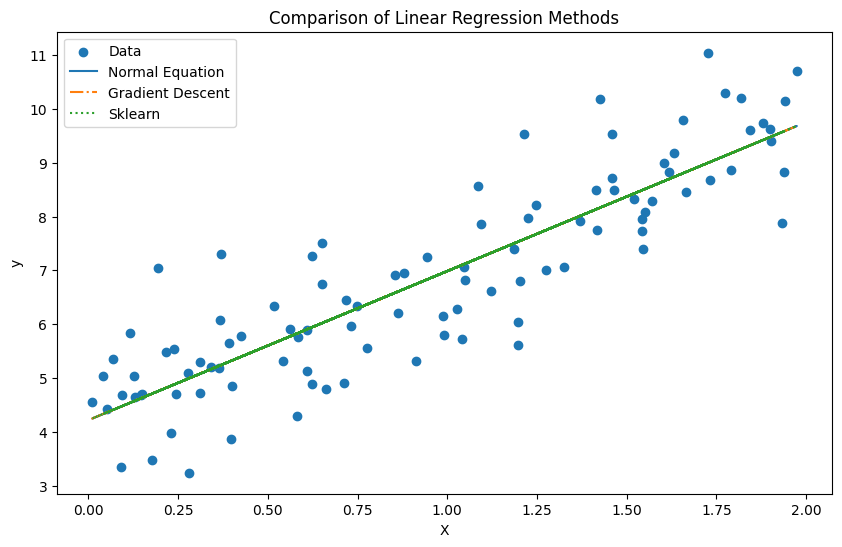

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Data")

plt.plot(X, y_pred_normal, linestyle="-", label="Normal Equation")
plt.plot(X, y_pred_gd, linestyle="-.", label="Gradient Descent")
plt.plot(X, y_pred_sklearn, linestyle=":", label="Sklearn")

plt.legend()
plt.title("Comparison of Linear Regression Methods")
plt.xlabel("X")
plt.ylabel("y")
plt.show()